In [7]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import GridSearchCV
import warnings
from tabulate import tabulate

In [8]:
current_dir = os.getcwd() 
relative_path = os.path.join('..', '..','data', 'train.csv')
train_data = pd.read_csv(os.path.join(current_dir, relative_path))

In [9]:
relative_path = os.path.join('..', '..','data', 'test.csv')
test_data = pd.read_csv(os.path.join(current_dir, relative_path))

In [10]:
relative_path = os.path.join('..', '..','data', 'dataset.csv')
data = pd.read_csv(os.path.join(current_dir, relative_path))

In [11]:
x_train = train_data.drop(["Attrition"], axis = 1)
y_train = train_data["Attrition"]

x_test = test_data.drop(["Attrition"], axis = 1)
y_test = test_data["Attrition"]

x = data.drop(["Attrition"], axis = 1)
y = data["Attrition"]

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


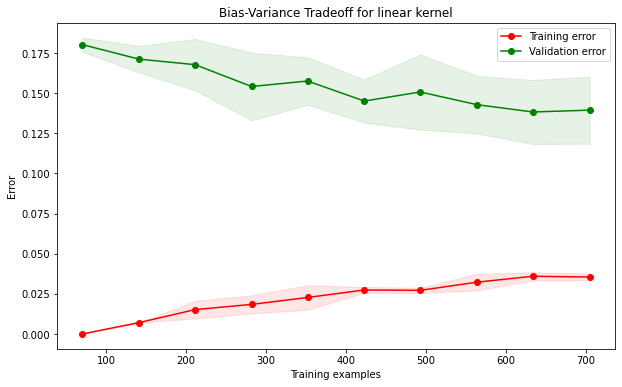

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


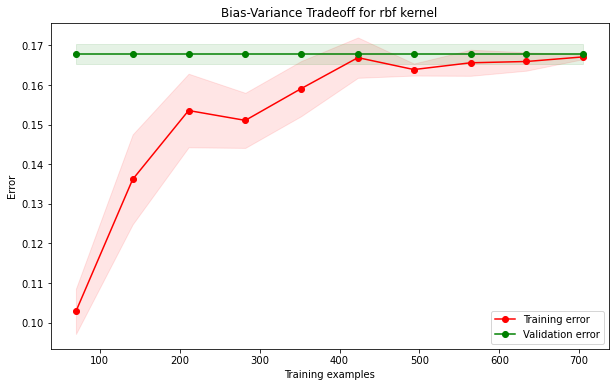

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


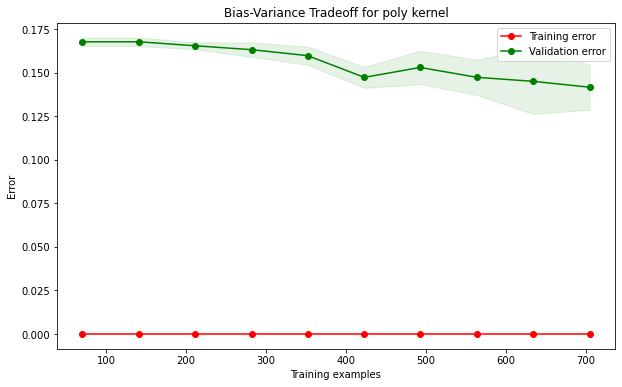

{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}


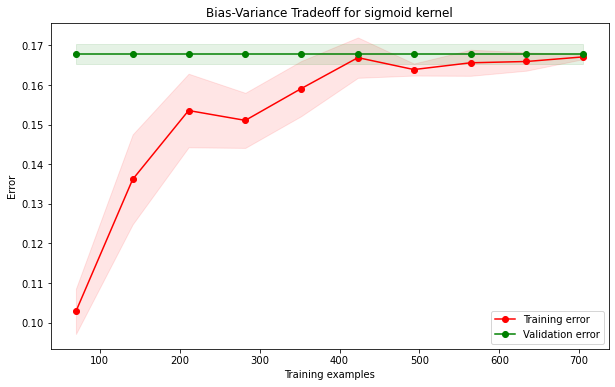

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}
{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}
{'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
{'C': 1, 'gamma': 1, 'kernel': 'linear'}
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1, 'kernel': 'poly'}
{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}
{'C':

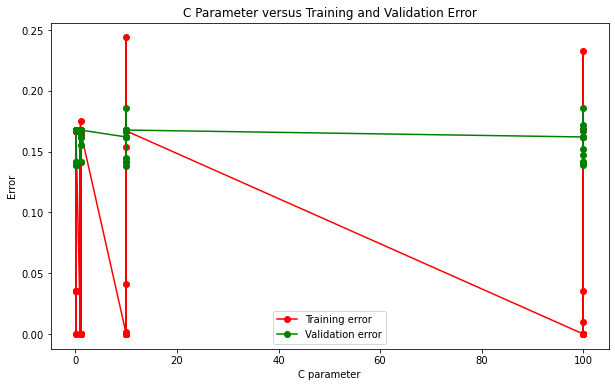

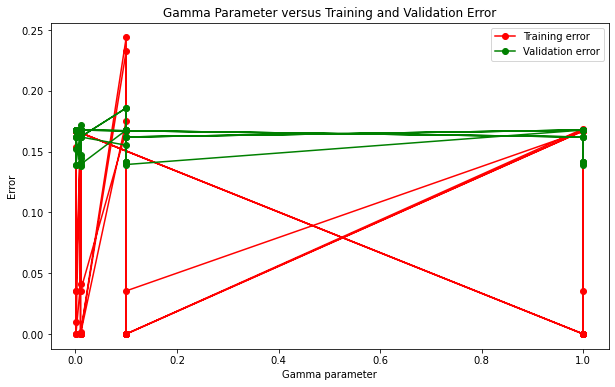

In [19]:
import warnings
from sklearn.model_selection import ParameterGrid, train_test_split, learning_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Define variables to store the best metrics
best_accuracy = 0
best_params = None
best_report = None
best_train_scores = None
best_val_scores = None

# Table rows
rows = []

# Track unique kernel types
unique_kernels = set()

# Track C values, gammas, and corresponding errors
c_values = []
gamma_values = []
training_errors = []
validation_errors = []

# Iterate over all combinations of hyperparameters
for params in ParameterGrid(param_grid):

    print(params)

    # Create the SVM model
    svm = SVC(**params)

    # Train the model
    svm.fit(X_train_encoded, y_train)

    # Calculate training and validation scores
    train_sizes, train_scores, val_scores = learning_curve(svm, X_train_encoded, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and standard deviation for each training size
    train_mean = 1 - np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = 1 - np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)


    # Store C and gamma values and corresponding errors
    c_values.append(params['C'])
    gamma_values.append(params['gamma'])
    training_errors.append(train_mean[-1])  # Take the last error value for full training set
    validation_errors.append(val_mean[-1])  # Take the last error value for full training set

    # Plot the bias-variance tradeoff only once for each kernel type
    if params['kernel'] not in unique_kernels:
        plt.figure(figsize=(10, 6))
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training error")
        plt.plot(train_sizes, val_mean, 'o-', color="g", label="Validation error")
        plt.xlabel("Training examples")
        plt.ylabel("Error")
        plt.title(f"Bias-Variance Tradeoff for {params['kernel']} kernel")
        plt.legend(loc="best")
        plt.show()

        # Add the kernel type to the set
        unique_kernels.add(params['kernel'])

    # Make predictions
    y_pred = svm.predict(X_test_encoded)

    # Calculate metrics
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the best parameters
    if report['accuracy'] > best_accuracy:
        best_accuracy = report['accuracy']
        best_params = params
        best_report = report
        best_train_scores = svm.score(X_train_encoded, y_train)
        best_val_scores = svm.score(X_val_encoded, y_val)

    # Append the row
    rows.append([params, report['accuracy'], report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score'],
                 report['weighted avg']['support'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'],
                 svm.score(X_train_encoded, y_train), svm.score(X_val_encoded, y_val)])

# Table headers with added Training and Validation Scores
headers = ["Parameters", "Accuracy", "Precision", "Recall", "F1 Score", "Support", "Macro Precision", "Macro Recall", "Macro F1 Score",
           "Train Score", "Val Score"]

# Print the table
print(tabulate(rows, headers=headers, tablefmt='github'))

# Print the best parameters and the report for the best accuracy
print("________________________________________________")
# Print the best accuracy and corresponding metrics
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)
print("Best Training Accuracy:", best_train_scores)
print("Best Validation Accuracy:", best_val_scores)

print("\nClassification Report for Best Accuracy:")
report_df = pd.DataFrame(best_report).transpose()
print(tabulate(report_df, headers='keys', tablefmt='github'))




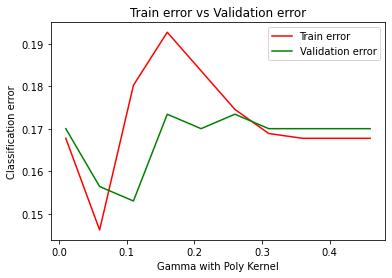

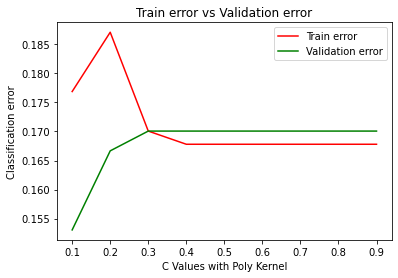

In [32]:
values= np.arange(0.01,0.5,0.05)
train_errors = []
valid_errors = []

for value in values:
    clf = SVC(kernel="sigmoid",gamma=value, C=1)
    clf.fit(X_train_encoded, y_train)
    predictions=clf.predict(X_test_encoded)
    train_error = 1.0 - clf.score(X_train_encoded,y_train)
    valid_error = 1.0 - clf.score(X_val_encoded, y_val)
    train_errors.append(train_error)
    valid_errors.append(valid_error)

# Plot the train and validation errors vs. gamma
plt.plot(values, train_errors, label='Train error',color='r')
plt.plot(values, valid_errors, label='Validation error',color='g')
plt.xlabel('Gamma with Poly Kernel')
plt.ylabel('Classification error')
plt.title('Train error vs Validation error')
plt.legend()
plt.show()


values= np.arange(0.1,1,0.1)
train_errors = []
valid_errors = []

for value in values:
    clf = SVC(kernel="sigmoid",gamma=value, C=1)
    clf.fit(X_train_encoded, y_train)
    predictions=clf.predict(X_test_encoded)
    train_error = 1.0 - clf.score(X_train_encoded,y_train)
    valid_error = 1.0 - clf.score(X_val_encoded, y_val)
    train_errors.append(train_error)
    valid_errors.append(valid_error)

# Plot the train and validation errors vs. gamma
plt.plot(values, train_errors, label='Train error',color='r')
plt.plot(values, valid_errors, label='Validation error',color='g')
plt.xlabel('C Values with Poly Kernel')
plt.ylabel('Classification error')
plt.title('Train error vs Validation error')
plt.legend()
plt.show()